<h1>Data Science 1st Assignment<h1>
<h3>Dataset: House Prices<h3>
<h3>Mahan Madani – 99222092<h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

<h3><b>1- Import the Dataset and Preprocess the Data

In [2]:
df = pd.read_csv("house_prices.csv")
print(df.columns)
print(df.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.drop(['MSSubClass', 'LotFrontage', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', "MiscFeature",
       'Alley', 'MasVnrType', 'FireplaceQu', 'Fence', 'YrSold', 'KitchenAbvGr',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

<h4>Handle Null Values</h4>
Drop all records that contain a null value (Unless if the null value belongs to the "Aritst Genres" column)

In [6]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
Id,0
MSZoning,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0


<h4>Convert Data Types

In [7]:
# Function to convert numeric month values to string month names
def numeric_to_month_name(numeric_month):
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return month_names[numeric_month - 1]  # Subtract 1 to get the correct index

# Apply the function to the "Month" column
df['MoSold'] = df['MoSold'].apply(numeric_to_month_name)


In [8]:
df['MoSold'].value_counts()


MoSold
June         253
July         234
May          204
April        141
August       122
March        106
October       89
November      79
September     63
December      59
January       58
February      52
Name: count, dtype: int64

<h3><b>2- Data Analysis

In [9]:
df.describe()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,1162.626712,346.992466,1515.463699,1.565068,0.382877,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,180921.195890
std,421.610009,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,386.587738,436.528436,525.480383,0.550916,0.502885,0.815778,1.625393,0.644666,24.689725,0.747315,213.804841,79442.502883
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,882.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,129975.000000
50%,730.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,1087.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,163000.000000
75%,1095.250000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,1391.250000,728.000000,1776.750000,2.000000,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,214000.000000
max,1460.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,755000.000000


In [10]:
df.describe(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1423,1423,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,5,6,4,4,6,5,2,5,4,7,6,3,5,5,3,12,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,June,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,906,1282,647,649,1311,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,253,1267,1198


<h3><b>3- Data Visualization

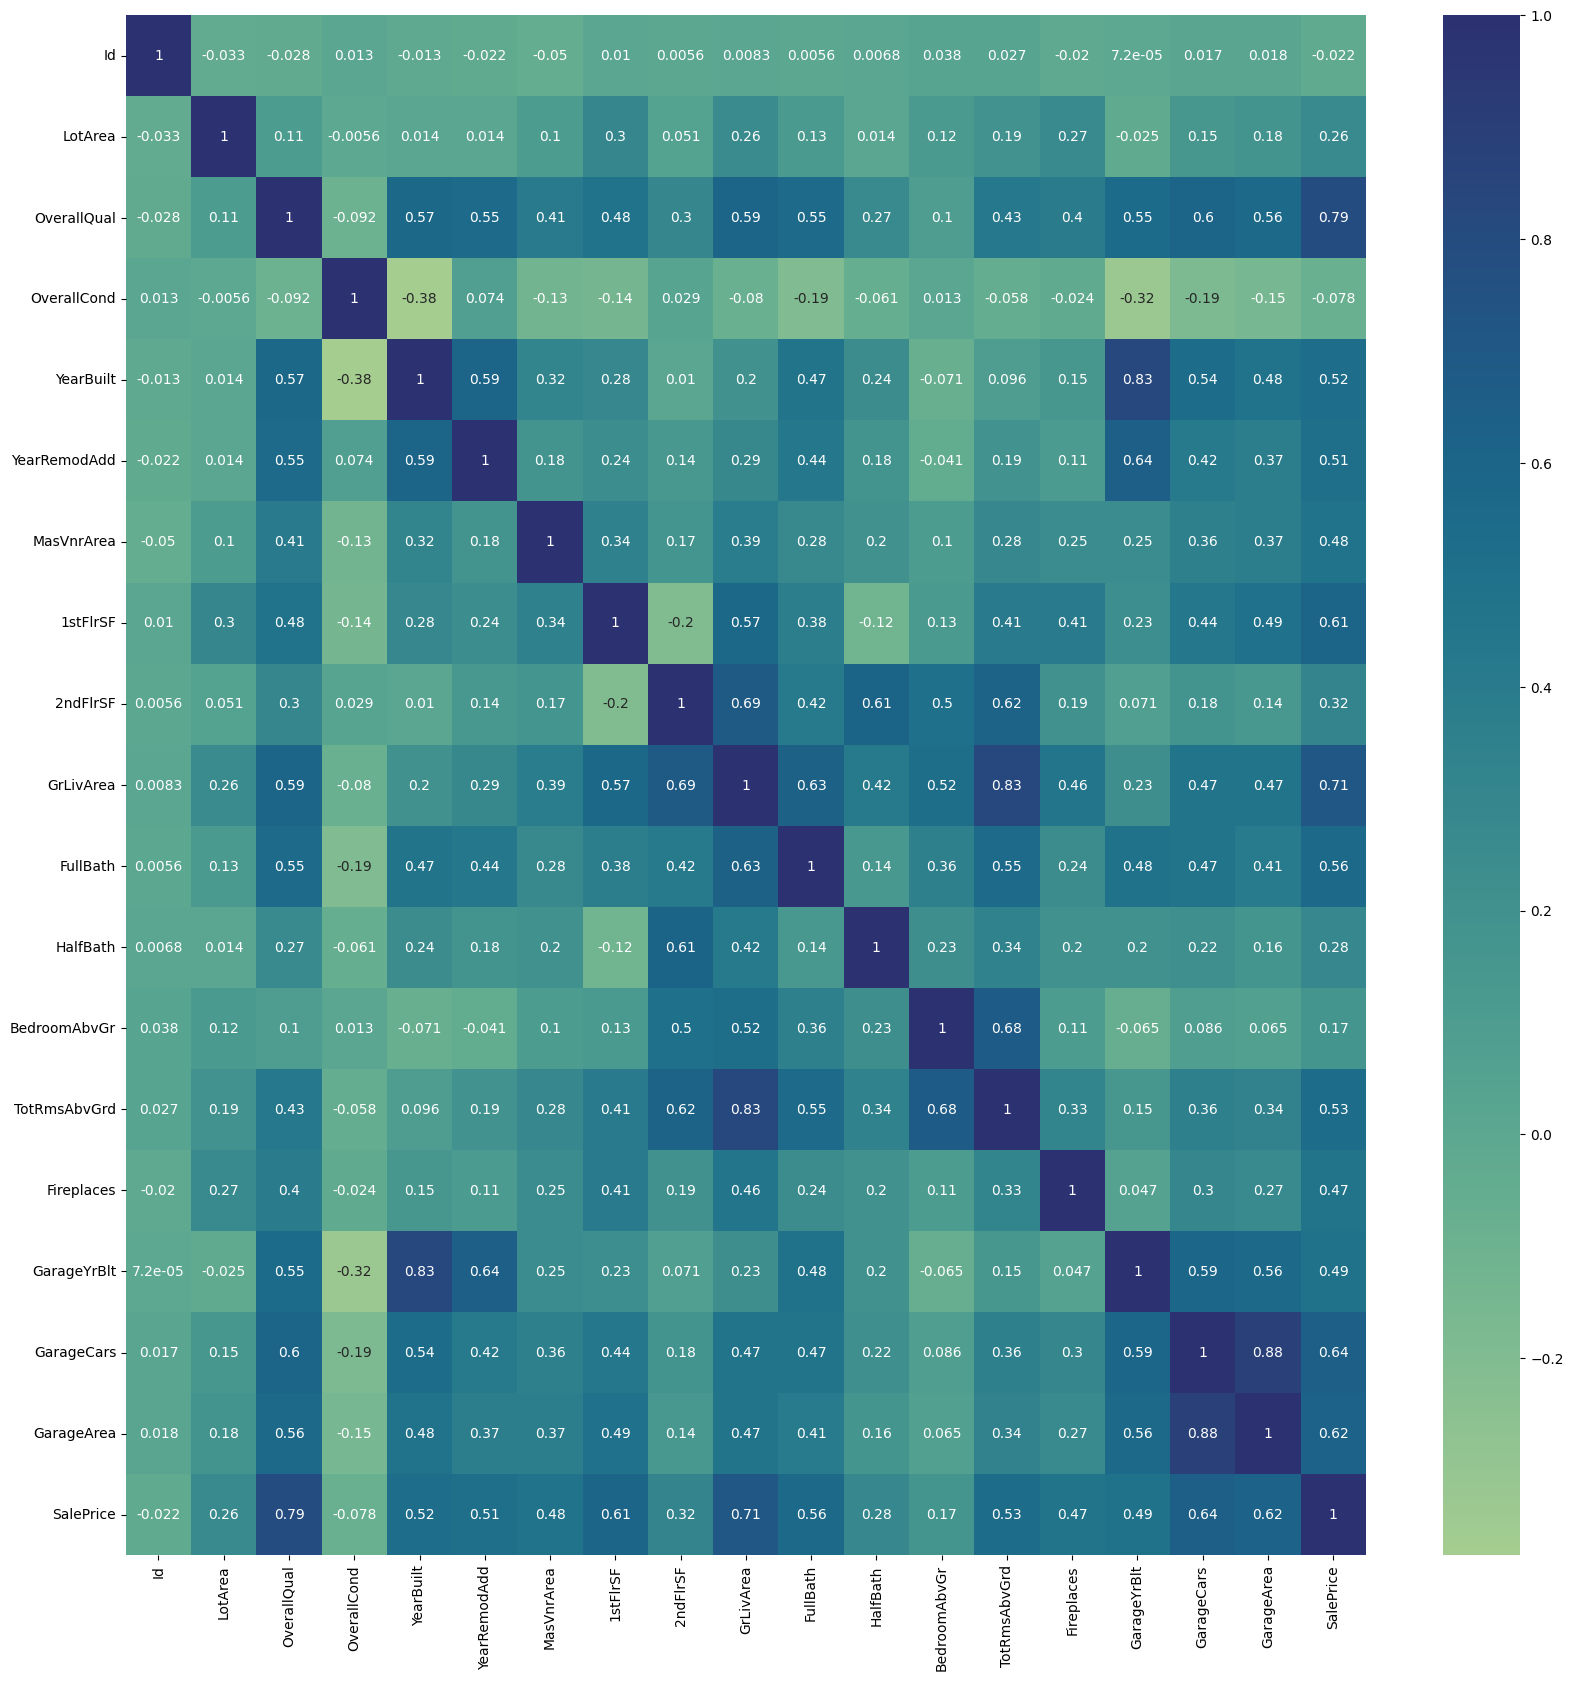

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest')
plt.show()

Text(0, 0.5, 'Houses Sold')

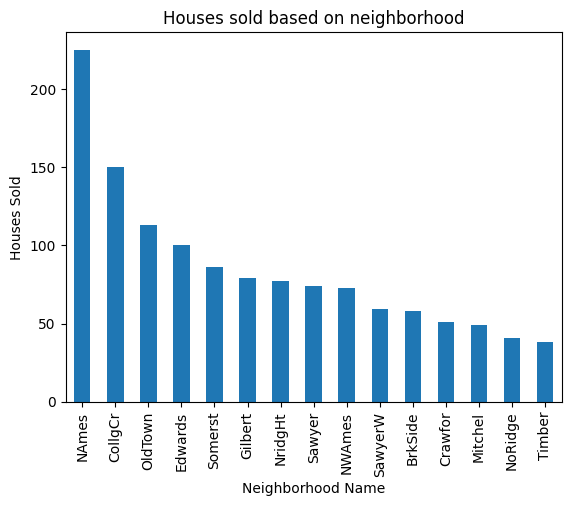

In [12]:
ax = df['Neighborhood'].value_counts() \
    .head(15) \
    .plot(kind='bar', title='Houses sold based on neighborhood')
ax.set_xlabel('Neighborhood Name')
ax.set_ylabel('Houses Sold')

Text(0, 0.5, 'Count')

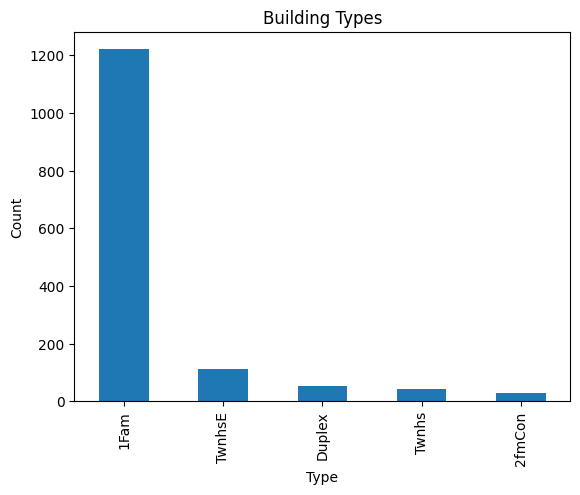

In [13]:
ax = df['BldgType'].value_counts() \
    .plot(kind='bar', title='Building Types')
ax.set_xlabel('Type')
ax.set_ylabel('Count')

Text(0.5, 0, 'Quality')

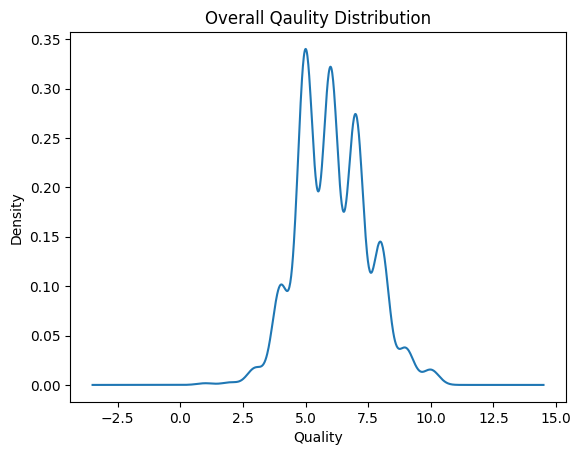

In [14]:
ax = df['OverallQual'].plot(kind='kde',
                          title='Overall Qaulity Distribution')
ax.set_xlabel('Quality')

Text(0.5, 0, 'Price')

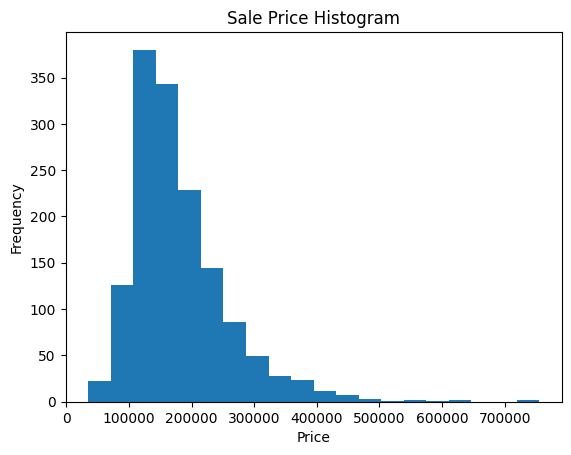

In [15]:
ax = df['SalePrice'].plot(kind='hist',
                          bins=20,
                          title='Sale Price Histogram')
ax.set_xlabel('Price')

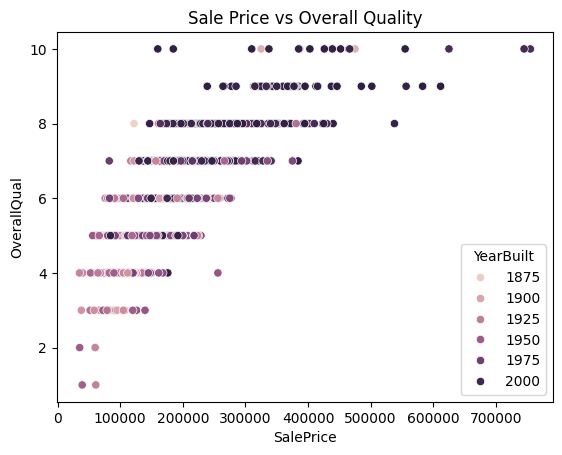

In [16]:
ax = sns.scatterplot(x='SalePrice',
                y='OverallQual',
                hue='YearBuilt',
                data=df)
ax.set_title('Sale Price vs Overall Quality')
plt.show()

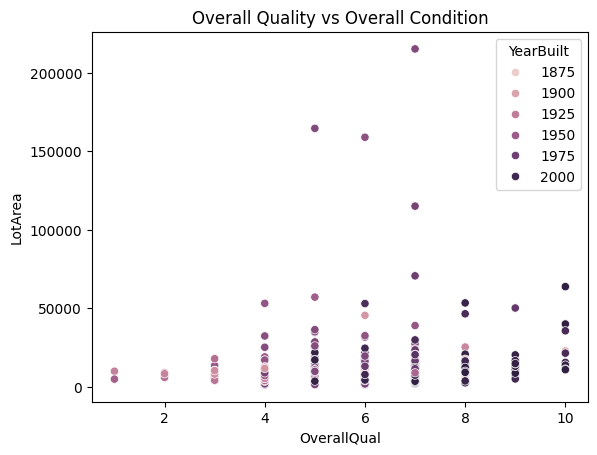

In [17]:
ax = sns.scatterplot(x='OverallQual',
                y='LotArea',
                hue='YearBuilt',
                data=df)
ax.set_title('Overall Quality vs Overall Condition')
plt.show()

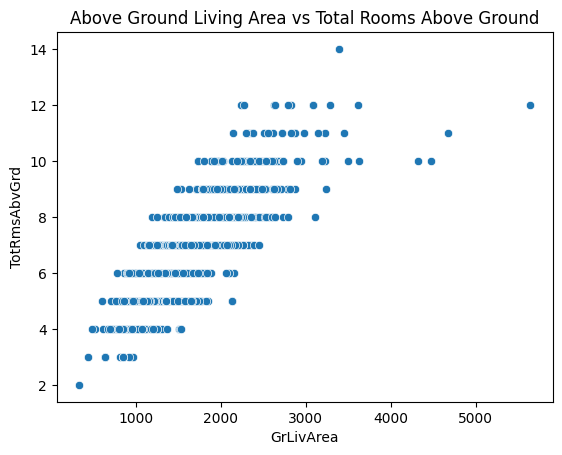

In [18]:
ax = sns.scatterplot(x='GrLivArea',
                y='TotRmsAbvGrd',
                data=df)
ax.set_title('Above Ground Living Area vs Total Rooms Above Ground')
plt.show()

<h3><b>4- Statistical Tests

<h4>H0 - 1:

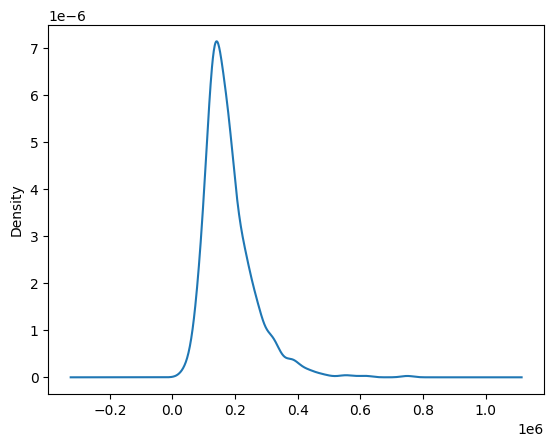

In [25]:
df['SalePrice'].plot(kind='kde')
plt.show()

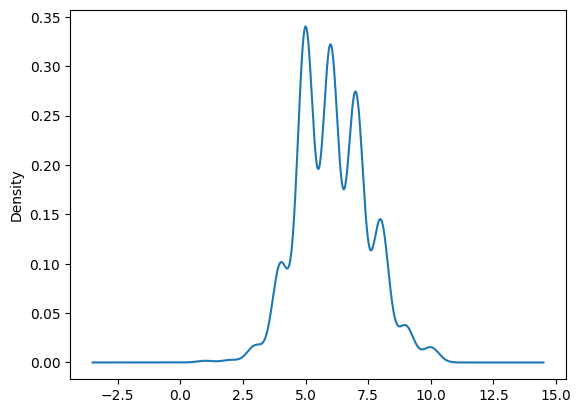

In [26]:
df['OverallQual'].plot(kind='kde')
plt.show()

In [27]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.spearmanr(sample['SalePrice'], sample['OverallQual'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


0.7647497349650353
p_value: 1.0155162003439273e-10
Reject the null hypothesis.


<h4>H0 - 2

In [30]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.spearmanr(sample['TotRmsAbvGrd'], sample['GrLivArea'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


0.8623824120800478
p_value: 8.516073815441696e-16
Reject the null hypothesis.


<h4>H0 - 3

In [34]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.pearsonr(sample['YearBuilt'], sample['OverallQual'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


0.4666301182755865
p_value: 0.0006358896333206537
Reject the null hypothesis.


<h4>H0 - 4

In [36]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.spearmanr(sample['SalePrice'], sample['GrLivArea'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

0.759359316310484
p_value: 1.63609677026655e-10
Reject the null hypothesis.


<h4>H0 - 5

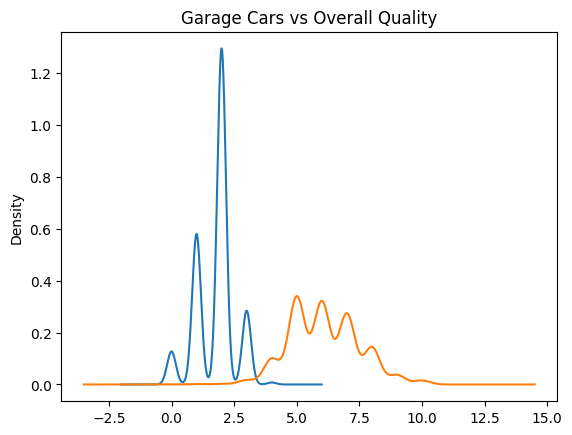

In [39]:
df['GarageCars'].plot(kind='kde')
df['OverallQual'].plot(kind='kde',
                        title='Garage Cars vs Overall Quality')
plt.show()

In [40]:
sample_size = 50
sample = df.sample(n=sample_size, random_state=3)

correlation_coefficient, p_value = stats.pearsonr(sample['OverallQual'], sample['GarageCars'])
print(correlation_coefficient)
print(f"p_value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

0.5685927775179848
p_value: 1.6487648185226836e-05
Reject the null hypothesis.
